In [2]:
# Importing predefined libraries required

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

plt.rc("font", size=14)

from sklearn.model_selection import cross_validate

#  Here database.csv is the data on which basis we are going to predict. Make sure that both the files are in the same folder for succesful execution.
#  Replace the file path below based on where the file is placed before running the code

data = pd.read_csv("database.csv")
data.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns

# Now we have to clean the data to remove null values using drop syntax

data_clean=data.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],axis=1)
data_clean=data_clean.dropna()
data_clean=data_clean.drop(['Date','Time','Type'],axis=1)
data_clean=data_clean.drop(['ID','Source','Location Source','Magnitude Source','Status'],axis=1)

print(data_clean.shape)


(23409, 5)


In [5]:
X = data_clean.iloc[:,0:4]
y = data_clean.iloc[:,4:5]

X=X.astype('float')
y=y.astype('str')


In [8]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

#   Training data after splitting
#   Create a Gaussian Classifier

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

C:\Users\Sairam Potnuru\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# ---------> Model Accuracy, how often is the classifier correct?

print('Accuracy of Naive_bayes classifier on train set: {:.2f}\n\n'.format(gnb.score(X_train, y_train)*100,2))

# ANOTHER METHOD for accuracy checking

from sklearn import metrics
print("Accuracy of Naive_bayes classifier on test set:",100-metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Naive_bayes classifier on train set: 21.63


Accuracy of Naive_bayes classifier on test set: 78.96805057235606


In [10]:
#  Importing Basemap from matplotlib library

from mpl_toolkits.basemap import Basemap

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

#  Here database.csv is the data on which basis we are going to predict. Make sure that both the files are in the same folder for succesful execution.
#  Replace the file path below based on where the file is placed before running the code

data = pd.read_csv('database.csv')

In [11]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()

RuntimeError: Can not put single artist in more than one figure

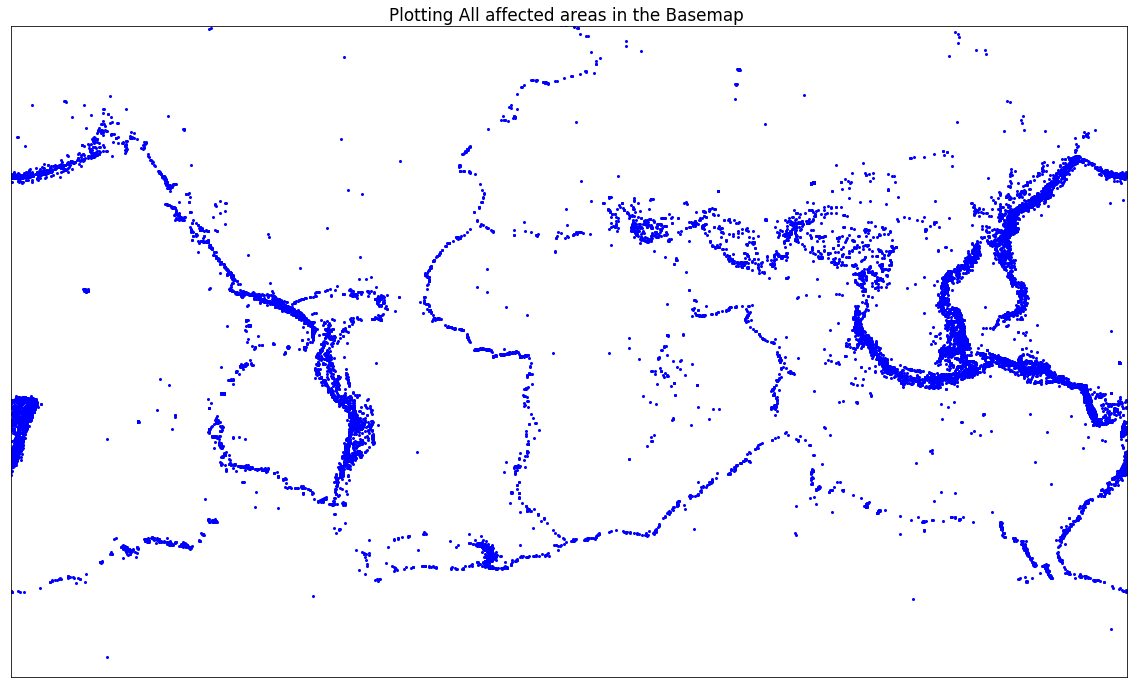

In [20]:
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(20,50))

plt.title("Plotting All affected areas in the Basemap ")

m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

RuntimeError: Can not put single artist in more than one figure

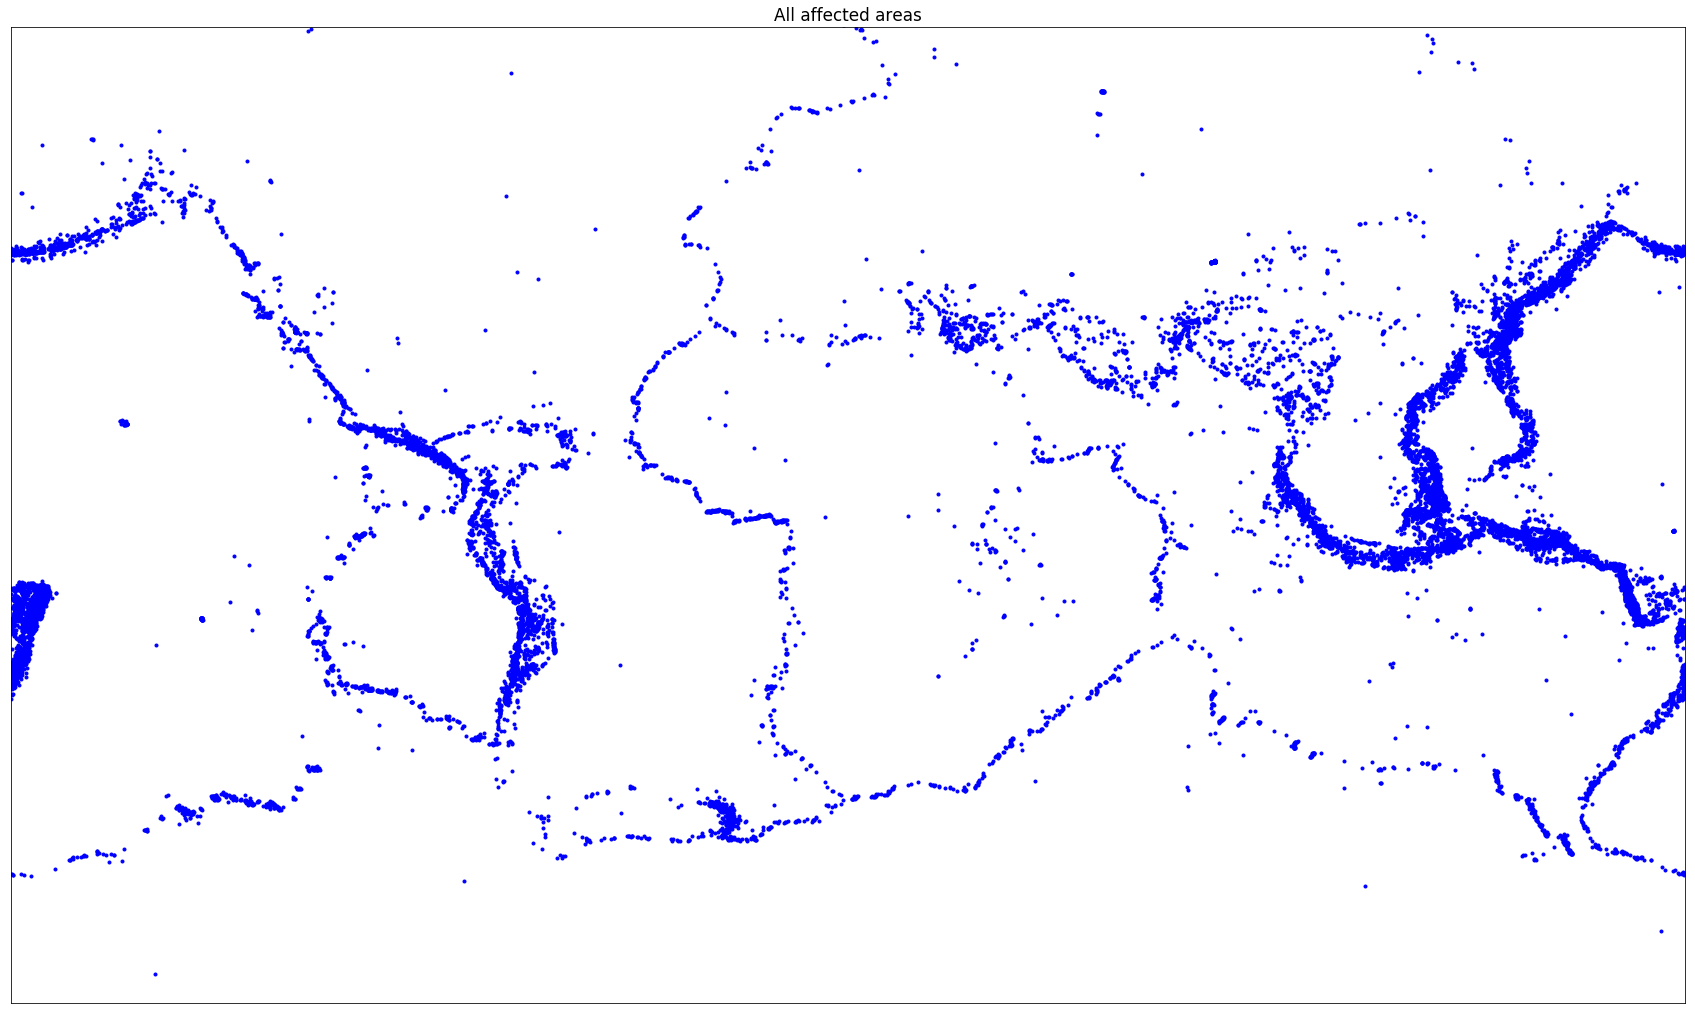

In [21]:
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(30,20))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines(color="green")
m.fillcontinents(color='0.8',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

The average earthquake is :  5.90534351145038

May cause slight Damage to Buildings and other Structures 
Investing in this location is bit risky ..


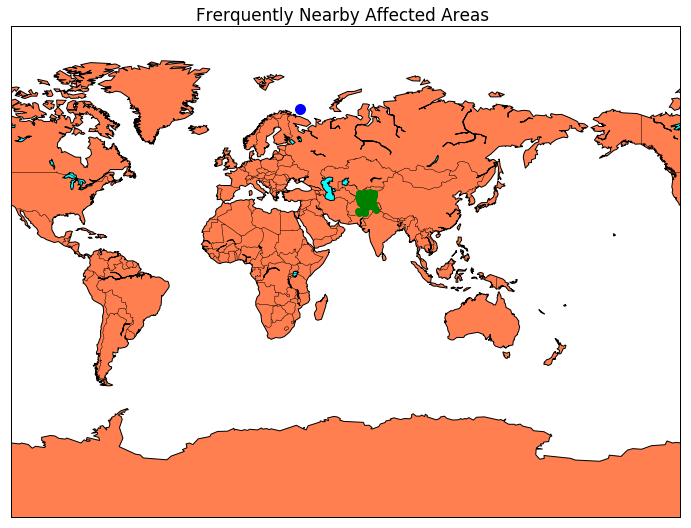

In [35]:
# Basemap can also be viewed in "Ortho" projection

#b = float(input("Enter Latitude :"))
#a = float(input("Enter Longitude :"))
a=75.0152
b=9.190

import pandas as pd
import numpy as np

data=pd.read_csv('database.csv')
x=data[(data["Longitude"] > a-5) & (data["Longitude"] < a+5) & (data["Latitude"] > b-5) & (data["Latitude"] < b+5) ]


l1=list(x["Longitude"])
l2=list(x["Latitude"])
m1=list(x["Magnitude"])

avg = x["Magnitude"].mean()
print("The average earthquake is : ",avg)
if(avg > 8):
    print("\nGreat Earthquake\nItcan totally destroy communities\n Hence it's not safe and is not recommended to invest heavy budgets in this location .")
elif(avg > 7):
    print("\nMajor Earthquake\nIt can cause Serious Damage\nhence it's not safe and is not recommended to invest more budget in this location .")
elif( avg > 6):
    print("\nMay cause a lot of damage in very populated areas\nInvesting in this location is a bit Risky ..")
elif(avg > 5):
    print("\nMay cause slight Damage to Buildings and other Structures \nInvesting in this location is bit risky ..")
elif( avg > 3.5 ):
    print("\nEarthquake is often felt but causes minor damage\nthere may be no human loss \nIts a bit safer to invest in this Locality ..")
else:
    print("\nUsually not felt but can be recorded by seismograph \nIts safe to invest in this location \nIt can be recommended for constructing buildings with heavy investments .")
 
from mpl_toolkits.basemap import Basemap

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
n = Basemap(projection='mill',lon_0=60,lat_0=60,resolution='c')
x,y = n(l1,l2)
fig3 = plt.figure(3,figsize=(12,10))
plt.title("Frerquently Nearby Affected Areas ")
n.plot(x,y, "o", markersize = 6, color = 'g')

x,y = n(a,b)
n.plot(x,y, "o", markersize = 10, color = 'blue')
n.drawcoastlines()
n.fillcontinents(color='coral',lake_color='aqua')
n.drawmapboundary()
n.drawcountries()
n.bluemarble()

plt.show()

